In [1]:
# 載入相關的程式庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### 利用 PANDAS 取得酒的品質資料
# 請記得把CSV檔放在當前的工作目錄 

#如何察知工作目錄:
import os
os.getcwd()

df_red = pd.read_csv("winequality_red.csv")
df_white = pd.read_csv("winequality_white.csv")

In [3]:
#資料整理
df_red["color"] = "R"
df_white["color"] = "W"

#整合紅酒與白酒的資料
df_all=pd.concat([df_red,df_white],axis=0)

# 檢查合併後的資料集
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [5]:
# 重新命名特徵
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                       'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [6]:
# 檢查重複數據
df_all.duplicated().sum()

1177

In [7]:
# 移除重複列
df_all.drop_duplicates(inplace = True)

In [8]:
# 檢查遺失值
df_all.isnull().sum().sum()

0

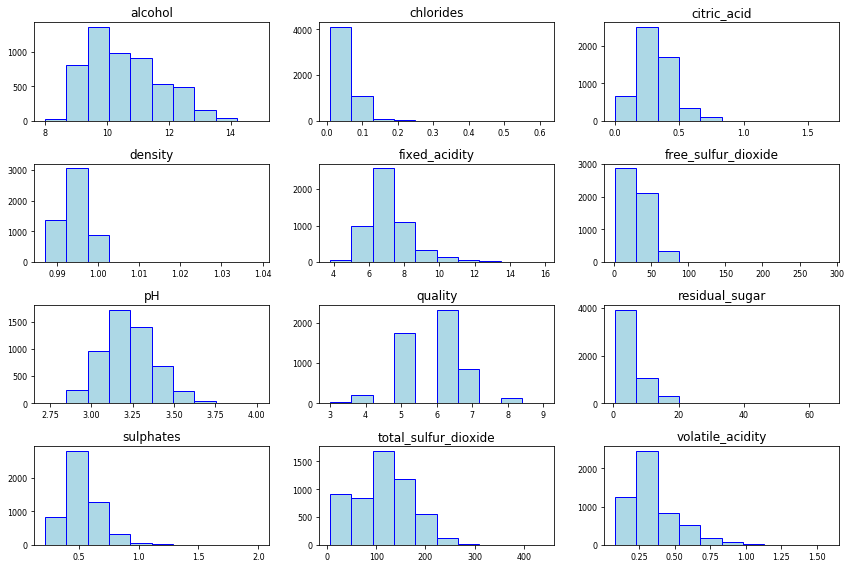

In [10]:
# 直方圖
df_all.hist(bins=10, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False) 
plt.tight_layout(rect=(1,1,3,3))

In [11]:
#要瞭解數據集的統計摘要,即記錄數、平均值、標準差、最小值和最大值,我們使用描述()。
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


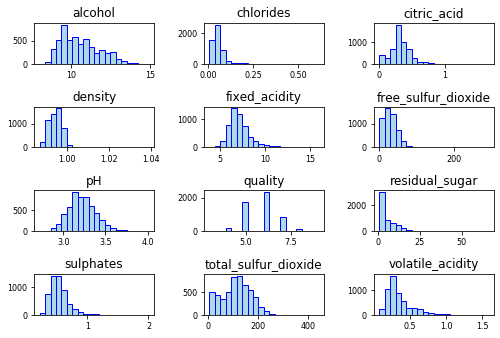

In [12]:
# 作業(1):更改df_all.hist裡面bins的參數值, 看看資料分布的變化

df_all.hist(bins=20, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)     
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

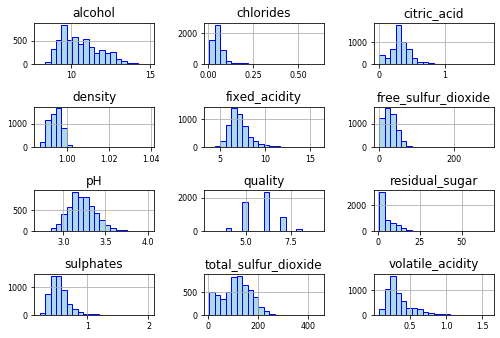

In [13]:
# 作業(2):延伸 作業(1), 更改df_all.hist裡面grid的參數值, 看看版面的變化, gird = True

df_all.hist(bins=20, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=True) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

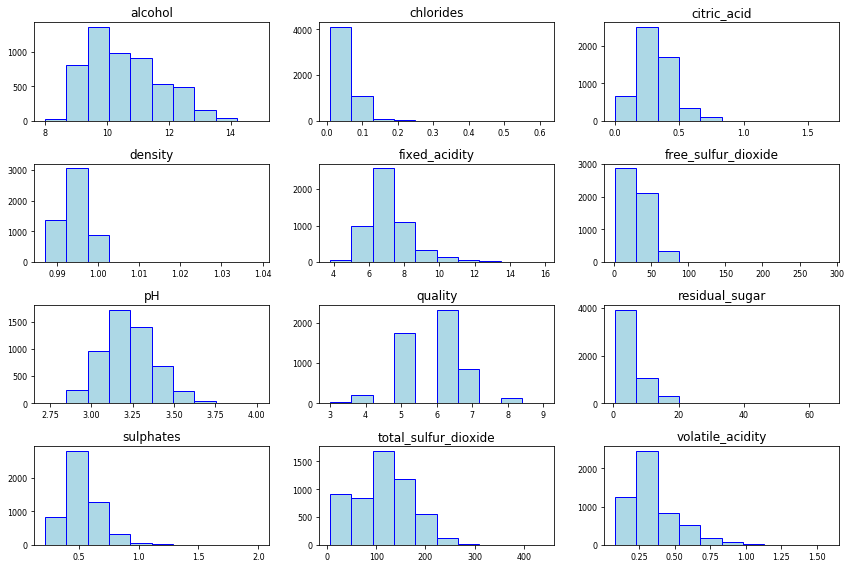

In [14]:
# 作業(3):更改 plt.tight_layout(rect=(x1, y1, x2, y2))

df_all.hist(bins=10, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)  
plt.tight_layout(rect=(1,1,3,3))